 <img width="60px" style="float: right;" src="https://xmks.s3.amazonaws.com/2020/X-Blue.png">
 
 # 🥇Golden Batch - Coffee Roasting Production Quality
 
 ---
 **By Jaun van Heerden**
 
In the competitive world of coffee production, achieving a "golden batch" is the pinnacle of quality assurance. The term refers to a batch of coffee beans that has been roasted to perfection, capturing the best possible aroma, flavor, and texture. In this Jupyter Notebook, we leverage Partial Least Squares (PLS) machine learning to monitor, predict, and optimize the quality of coffee roasting batches in real-time.
 


<div class="alert alert-block alert-info">
    <b>NOTE:</b> Execute <b>1 - Coffee Roasting Production Quality</b> first to preapre the data<br>The output should be <code>roaster.csv</code> & <code>clean.parquet</code> in the data folder</div>

# Glossary
1. **[Load in and Check Cleaned Data](#LoadCleanedData)**
2. **[Visualize Data](#VisualizeData)**
3. **[Select Best Variables Based on Variance Inflation Factor](#SelectBestVariables)**
4. **[Scale Data](#ScaleData)**
5. **[Split Data for Training and Testing](#SplitData)**
6. **[Perform Principal Component Analysis (PCA)](#PerformPCA)**
7. **[Create Partial Least Squares (PLS) Model](#CreatePLSModel)**
8. **[Get Model Coefficients](#GetModelCoefficients)**
9. **[Test New Datapoint](#TestNewDatapoint)**
10. **[Get Golden Points that are Close in the Process Stage](#GetGoldenPoints)**
11. **[Suggest Variables to Adjust](#SuggestVariablesToAdjust)**
12. **[Look at Predictions](#LookAtPredictions)**
13. **[Option 1 - Deploy into a Datastream with Python Agent](#DeployPythonAgent)**
14. **[Option 2 - Deploy into a Datastream with MLFlow](#DeployMLFlow)**

**Data Columns Explained**

The dataset consists of the following columns:

+ Avg_Temp_Chamber_1 to Avg_Temp_Chamber_5: These columns represent the average temperatures of different chambers involved in the coffee roasting process. Monitoring these temperatures is crucial for achieving the desired roast level.

+ H_data and AH_data: These columns represent humidity data and batch height data, respectively. Humidity plays a critical role in how effectively heat is transferred to the coffee beans.

+ quality: This is our target variable, representing the quality score of a batch. A higher score indicates a better roast.

+ batch_id: Identifies which batch the data belongs to.

+ time_in_batch: Indicates the time in minutes since the batch started.

+ date_time: Timestamps indicating when the data was recorded.

**Process:**

**Data Inspection:**
   - Begin by thoroughly examining the dataset to gain a comprehensive understanding of its structure and characteristics.

**Feature Engineering and Golden Batch Storage:**
   - Perform feature engineering to enhance the dataset, identifying and creating valuable features.
   - Store the optimal set of these feature-engineered "golden batches" and save them to a parquet file for future reference.

**Feature Standardization:**
   - Standardize the features to ensure uniformity and comparability among them.

**Train-Test Split:**
   - Split the dataset into training and testing sets to enable model evaluation.

**PCA Transformation Development:**
   - Construct a Principal Component Analysis (PCA) transformation to reduce dimensionality while preserving essential variance in the data.

**Feature Selection:**
   - Employ a rigorous process to select the most relevant features for modeling, based on their impact and importance.

**PLS Model Training:**
   - Train a Partial Least Squares (PLS) model using the chosen features to capture complex relationships within the data.

**New Data Point Testing:**
   - Utilize the KNN model to test and evaluate new data points, determining their proximity to existing data instances.

**Model Persistence:**
   - Save the trained models using Python's joblib library or MLflow for easy access and future deployment.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.neighbors import KNeighborsRegressor
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<a id='LoadCleanedData'></a>
## 1. Load in and Check Cleaned Data

In [2]:
# Load the dataset from the specified URL using pandas
df = pd.read_parquet("data/clean.parquet")
df = df.drop(["batch_change"], axis=1)
df

Avg_Temp_Chamber_1  Avg_Temp_Chamber_2  \
date_time                                                     
2015-01-01 00:00:00          211.000000          349.000000   
2015-01-01 00:01:00          211.333333          348.000000   
2015-01-01 00:02:00          211.333333          347.666667   
2015-01-01 00:03:00          211.666667          347.000000   
2015-01-01 00:04:00          211.666667          346.333333   
...                                 ...                 ...   
2018-05-03 23:01:00          255.666667          351.666667   
2018-05-03 23:02:00          255.666667          351.666667   
2018-05-03 23:03:00          255.666667          351.333333   
2018-05-03 23:04:00          255.666667          351.333333   
2018-05-03 23:05:00          255.666667          351.333333   

                     Avg_Temp_Chamber_3  Avg_Temp_Chamber_4  \
date_time                                                     
2015-01-01 00:00:00          476.000000          349.666667   
2015-01-01 00:01:00          476.333333          350.666667   
2015-01-01 00:02:00          476.666667          352.000000   
2015-01-01 00:03:00          477.000000          353.000000   
2015-01-01 00:04:00          477.666667          354.000000   
...                                 ...                 ...   
2018-05-03 23:01:00          447.000000          341.666667   
2018-05-03 23:02:00          447.333333          341.333333   
2018-05-03 23:03:00          447.333333          341.000000   
2018-05-03 23:04:00          447.666667          340.333333   
2018-05-03 23:05:00          448.000000          340.000000   

                     Avg_Temp_Chamber_5  H_data  AH_data  quality  batch_id  \
date_time                                                                     
2015-01-01 00:00:00          241.666667  167.85     9.22    392.0         0   
2015-01-01 00:01:00          241.666667  162.51     9.22    392.0         0   
2015-01-01 00:02:00          241.666667  164.99     9.22    392.0         0   
2015-01-01 00:03:00          241.666667  167.34     9.22    392.0         0   
2015-01-01 00:04:00          242.000000  163.04     9.22    392.0         0   
...                                 ...     ...      ...      ...       ...   
2018-05-03 23:01:00          256.000000  155.69     6.39    454.0     29190   
2018-05-03 23:02:00          255.666667  155.33     6.39    454.0     29190   
2018-05-03 23:03:00          255.333333  155.53     6.39    454.0     29190   
2018-05-03 23:04:00          255.333333  153.74     6.39    454.0     29190   
2018-05-03 23:05:00          255.333333  157.46     6.39    454.0     29190   

                     time_in_batch  
date_time                           
2015-01-01 00:00:00              0  
2015-01-01 00:01:00              1  
2015-01-01 00:02:00              2  
2015-01-01 00:03:00              3  
2015-01-01 00:04:00              4  
...                            ...  
2018-05-03 23:01:00              1  
2018-05-03 23:02:00              2  
2018-05-03 23:03:00              3  
2018-05-03 23:04:00              4  
2018-05-03 23:05:00              5  

[1755306 rows x 10 columns]

<a id='VisualizeData'></a>
## 2. Visualize data


In [3]:
import plotly.graph_objects as go
import pandas as pd

df_plot = df.iloc[:1000,:]

fig = go.Figure()

# Loop through each data column to add it to the plot
for column in df_plot.columns:
    fig.add_trace(go.Scatter(x=df_plot.index, y=df_plot[column], mode='lines', name=column))

fig.update_layout(
    title='Time Series Plot of Roasting Machine Data',
    xaxis_title='Date Time',
    yaxis_title='Sensor Readings',
    xaxis=dict(showline=True, showgrid=False),
    yaxis=dict(showline=True, showgrid=False)
)

fig.show()


<a id='SelectBestVariables'></a>
## 3. Select Best Variables Based on Variance Inflation Factor

The Variance Inflation Factor (VIF) is a measure used to detect multicollinearity in regression models. High VIF values (> 5-10) indicate that the predictor variable is highly correlated with other predictor variables in the model, making it difficult to isolate the variable's unique contribution to the target variable.

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=5.0):
    X = X.assign(const=1)  # faster than add_constant from statsmodels
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]
        vif = vif[:-1]  # don't let the constant be removed in the loop.
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables[:-1]])
    return X.iloc[:, variables[:-1]]

In [5]:
df_select = calculate_vif_(df)

Remaining variables:
Index(['Avg_Temp_Chamber_1', 'Avg_Temp_Chamber_2', 'Avg_Temp_Chamber_3',
       'Avg_Temp_Chamber_4', 'Avg_Temp_Chamber_5', 'H_data', 'AH_data',
       'quality', 'batch_id', 'time_in_batch'],
      dtype='object')


<a id='ScaleData'></a>
## 4. Scale Data
Data scaling is an essential preprocessing step, especially for algorithms that use distance-based metrics. This helps ensure that each feature contributes equally to the distance computation, rather than being dominated by variables with larger ranges.

In [6]:
quality_top = df['quality'].quantile(0.9)
df_top = df[df['quality'] >= quality_top]

df_top.to_parquet("data/golden.parquet")

# # Create a subset of the data for golden batches (quality > 90%) to be used for KNN regression
X_golden = df_top.drop(['quality', 'batch_id'], axis=1)
y_golden = df_top['quality']

In [7]:
# Prepare the feature matrix X and target vector y for model development
X = df.drop(['quality', 'batch_id'], axis=1)
y = df['quality']

<a id='SplitData'></a>
## 5. Split Data for Training and Testing

Splitting your dataset into training and testing subsets is crucial for evaluating the performance of your machine learning model. This helps to ensure that your model generalizes well to new, unseen data, and it mitigates the risk of overfitting.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scale the golden batches data using the same scaler
X_golden_scaled = scaler.transform(X_golden.values)

c:\Users\JaunvanHeerden\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



<a id='PerformPCA'></a>
## 6. Perform Principal Component Analysis (PCA)

PCA reduces the dimensionality of your data, making it easier to work with and helping to highlight its underlying structure.

In [10]:
# Perform PCA for feature selection on the scaled training data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Get the loadings of the PCA model
loadings = pd.DataFrame(pca.components_.T, columns=[f'PCA Component {i+1}' for i in range(pca.n_components_)], index=X.columns)

# Display the loadings
print("PCA Loadings:")
print(loadings)

PCA Loadings:
                    PCA Component 1  PCA Component 2
Avg_Temp_Chamber_1        -0.390259        -0.469263
Avg_Temp_Chamber_2        -0.221648         0.458291
Avg_Temp_Chamber_3         0.505082        -0.254192
Avg_Temp_Chamber_4        -0.426701         0.499834
Avg_Temp_Chamber_5         0.361458         0.433573
H_data                     0.457074         0.248868
AH_data                   -0.147691         0.070511
time_in_batch             -0.002763        -0.020523


<a id='CreatePLSModel'></a>
## 7. Create Partial Least Squares (PLS) Model

PLS is particularly useful when the predictors in your model are highly collinear, or when you have more predictors than observations. It combines features of PCA and linear regression to improve the predictability of your model.

In [11]:
# Use PLS for model development with a specified number of components
pls = PLSRegression(n_components=2)
pls.fit(X_train_scaled, y_train)

PLSRegression()

In [12]:
# Transform the scaled data to the PCA space using the PLS model
X_train_scaled_pca = pca.transform(X_train_scaled)
X_golden_scaled_pca = pca.transform(X_golden_scaled)

In [13]:
# Evaluate the PLS model on the test data and calculate the R^2 score
score = pls.score(X_test_scaled, y_test)
print(f'Best PLS R^2 score on test data: {score}')

Best PLS R^2 score on test data: 0.7614491407322634



Achieving an 
PLS
R^2
  score of approximately 0.76  is generally considered good.

<a id='GetModelCoefficients'></a>
## 8. Get Model Coefficients

Understanding the model coefficients is crucial for interpreting the model. The coefficients indicate the weight or importance assigned to each feature, helping you understand how each contributes to the prediction.

In [14]:
# Get the coefficients of the PLS model
coefficients = pls.coef_[0]

# Create a DataFrame to store the variable suggestions
variable_suggestions = pd.DataFrame({'Variable': X.columns, 'Coefficient': coefficients})

# Suggest variables to adjust
positive_suggestions = variable_suggestions[variable_suggestions['Coefficient'] > 0].sort_values(by='Coefficient', ascending=False)
negative_suggestions = variable_suggestions[variable_suggestions['Coefficient'] < 0].sort_values(by='Coefficient', ascending=False)

print("\nSuggested Variables to Adjust (Positive Influence):")
print(positive_suggestions)
print("\nSuggested Variables to Adjust (Negative Influence):")
print(negative_suggestions)


Suggested Variables to Adjust (Positive Influence):
             Variable  Coefficient
4  Avg_Temp_Chamber_5    10.112207
5              H_data     8.553715
0  Avg_Temp_Chamber_1     8.359799
1  Avg_Temp_Chamber_2     4.219145

Suggested Variables to Adjust (Negative Influence):
             Variable  Coefficient
7       time_in_batch    -0.015228
3  Avg_Temp_Chamber_4    -0.058532
6             AH_data    -1.463906
2  Avg_Temp_Chamber_3   -36.952965


### Analysis: Variables Influencing Coffee Roasting Quality

#### Positive Influence:

1. **Avg_Temp_Chamber_5**: With the highest positive coefficient of 10.106557, this suggests that a unit increase in the average temperature in Chamber 5 directly correlates with a significant improvement in the end quality. Chamber 5 is likely the final stage in the roasting process, making its conditions crucial for defining the batch quality.

2. **H_data**: Humidity data has the second-highest positive coefficient at 8.538124. This indicates that maintaining proper humidity levels during the process positively impacts the final quality. 

3. **Avg_Temp_Chamber_1 and Avg_Temp_Chamber_2**: These initial chambers also have positive coefficients (8.367347 and 4.210157 respectively), suggesting that starting the batch at the correct temperatures is important for achieving high-quality output.

#### Negative Influence:

1. **Avg_Temp_Chamber_3**: With a significantly negative coefficient of -36.952836, careful attention is needed for this chamber. Excessive heat at this stage appears to have a detrimental impact on quality.

2. **AH_data**: The negative coefficient of -1.460705 suggests that Absolute Humidity should be carefully controlled to prevent quality degradation.

3. **Avg_Temp_Chamber_4 and time_in_batch**: These variables have relatively small negative coefficients (-0.060221 and -0.014208 respectively). Although their influence is minor, reducing the time spent in a batch or adjusting the temperature in Chamber 4 could marginally improve quality.

#### Strategic Insights:

Since this is a batch process and quality is assessed at the end of a 1-hour cycle, focusing on the highest-impact variables (both positive and negative) can optimize the overall operation. Given the positive impact of Chamber 5 and humidity, these should be monitored closely for quality control, while Chamber 3 requires special attention to avoid negative impacts.

----
<a id='TestNewDatapoint'></a>
## 9. Test New Datapoint

In [15]:
import random
X_new = X_test.iloc[random.randrange(len(X_test))]   # new datapoint

# scale
X_new_scaled = scaler.transform([X_new])

# PCA
X_new_scaled_pca = pca.transform(X_new_scaled)[0]

X_new_scaled_pca

c:\Users\JaunvanHeerden\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([-0.68192196, -0.3026188 ])

<a id='GetGoldenPoints'></a>
## 10. Get Golden Points that are Close in the Process Stage

### Get Closest Golden Points Based on Process Stage

#### Objective:

In the production of golden batch coffee, we aim to find data points that are closest to a new input data point (`X_new`) in terms of their `time_in_batch`. This allows us to benchmark against the best practices observed in these golden batches.

#### Steps:

1. **Load Golden Data**: `df_gold` is loaded from a parquet file, which contains only batches that have previously been identified as high-quality, or "golden."

2. **Calculate Difference**: The absolute difference between the `time_in_batch` of each row in `df_gold` and the new data point `X_new` is computed and stored in a new column called `diff`.

3. **Sort by Difference**: The DataFrame is sorted based on the `diff` column to find the closest points in terms of `time_in_batch`.

4. **Select Top Points**: Only the top 1% closest points are considered for further analysis. This filtering is achieved through the `.head(df_gold_top_num)` method.

5. **Data Cleanup**: We drop columns that are not needed for the machine learning model, including `quality`, `batch_id`, and `diff`.

6. **Scale and PCA**: The selected data points are then scaled using the same scaler object that was used for the original dataset. They are also transformed using PCA to align them with the original feature space.


In [16]:
df_gold = pd.read_parquet("data/golden.parquet")
df_gold["diff"] = abs(df_gold["time_in_batch"] - X_new["time_in_batch"])

# Sort DataFrame by the 'diff' column
df_gold_sorted = df_gold.sort_values(by='diff')

# Select the top 10% of closest points
df_gold_top_num = int(np.ceil(0.01 * len(df_gold_sorted)))
df_gold_top = df_gold_sorted.head(df_gold_top_num)


# drop quality, batch_id and diff
X_gold_top = df_gold_top.drop(["quality","batch_id", "diff"], axis=1)

# scale and pca
X_gold_scaled = scaler.transform(X_gold_top)
X_gold_scaled_pca = pca.transform(X_gold_scaled)
X_gold_scaled_pca

array([[ 0.62435274,  1.50505484],
       [-0.5175636 ,  0.65558467],
       [-0.72312451,  0.51386656],
       ...,
       [-1.17760004, -0.07902974],
       [-0.80139832,  1.09138241],
       [-0.61227244,  0.59601137]])

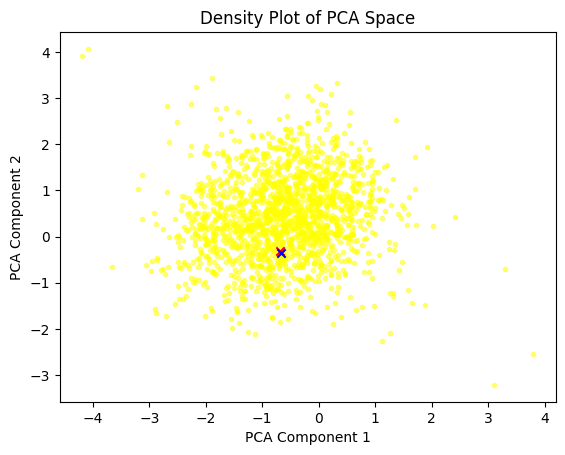

In [17]:
# Calculate the Euclidean distance between the transformed point and each point in the transformed dataset
distances = np.linalg.norm(X_gold_scaled_pca - X_new_scaled_pca, axis=1)

# Find the index of the closest point
closest_gold_index = np.argmin(distances)

closest_gold_scaled = X_gold_scaled[closest_gold_index]
closest_gold_scaled_pca = X_gold_scaled_pca[closest_gold_index]

plt.scatter(X_gold_scaled_pca[:,0], X_gold_scaled_pca[:,1], c='yellow', marker='.', label='Golden Batches', alpha=0.5)
plt.scatter(X_new_scaled_pca[0], X_new_scaled_pca[1], c='red', marker='x', label='New Batch')
plt.scatter(closest_gold_scaled_pca[0], closest_gold_scaled_pca[1], c='blue', marker='x', label='Closest Golden Batch')

# Add labels and title
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Density Plot of PCA Space')

# Show the plot
plt.show()


<a id='SuggestVariablesToAdjust'></a>
## 11. Suggest Variables to Adjust

#### Objective:

The primary goal is to recommend variables that should be adjusted to improve the quality of the coffee roasting batch. This is based on both the coefficients derived from the PLS model and the difference between the new batch (`X_new_scaled`) and the closest golden batch (`closest_gold_scaled`).

#### Steps:

1. **Extract Coefficients**: The coefficients from the PLS model are stored in the DataFrame `variable_suggestions`.

2. **Identify Positive and Negative Influencers**: Variables are sorted into those that have a positive or negative influence on the quality based on their PLS coefficients.

3. **Find Coinciding Suggestions**: We identify which of these variables also show a deviation in the new batch compared to the closest golden batch.

4. **Create Suggestions Dictionary**: Two dictionaries, `suggestions_dict_pos` and `suggestions_dict_neg`, are prepared with initial zero values for all variables.

5. **Fill in the Dictionary**: For each variable that needs adjustment, its value in the corresponding dictionary is updated with the coefficient from the PLS model. 

#### Output:

- `positive`: Dictionary of variables that should be increased, along with the weight of their positive impact
- `negative`: Dictionary of variables that should be decreased, along with the weight of their negative impact

#### Tips:

- Always cross-reference these suggestions with real-world constraints, as the model won't be aware of practical limitations.
- The higher the absolute value of the coefficient, the more significant the variable is, but this doesn't necessarily mean the adjustment has to be large.

By doing this, we get a tailored set of actionable recommendations that are both rooted in the analytical rigor of PLS and specifically targeted to the conditions of the new batch.

In [18]:
# Get the coefficients of the PLS model
coefficients = pls.coef_[0]

# Create a DataFrame to store the variable suggestions
variable_suggestions = pd.DataFrame({'Variable': X.columns, 'Coefficient': coefficients})

# Get variable suggestions based on PLS model
positive_suggestions = variable_suggestions[variable_suggestions['Coefficient'] > 0]
negative_suggestions = variable_suggestions[variable_suggestions['Coefficient'] < 0]

# Get the variable differences between the new batch and the closest golden batch
diff = X_new_scaled - closest_gold_scaled

diff = pd.DataFrame(diff, columns=X.columns)

# Get variable differences that coincide with the PLS suggestions
positive_coinciding_suggestions = positive_suggestions[positive_suggestions['Variable'].isin(diff.columns[diff.gt(0).any()])]
negative_coinciding_suggestions = negative_suggestions[negative_suggestions['Variable'].isin(diff.columns[diff.lt(0).any()])]

# Start with a dictionary where all variables are set to 0
suggestions_dict_pos = dict.fromkeys(X.columns, 0)
suggestions_dict_neg = dict.fromkeys(X.columns, 0)

# Get the variables to adjust based on the PLS suggestions
variables_to_adjust_pos = positive_coinciding_suggestions['Variable'].tolist()
variables_to_adjust_neg = negative_coinciding_suggestions['Variable'].tolist()

# For each variable that needs to be adjusted, set the value in the dictionary to the corresponding coefficient
for var in variables_to_adjust_pos:
    suggestions_dict_pos[var] = positive_coinciding_suggestions.loc[positive_coinciding_suggestions['Variable'] == var, 'Coefficient'].values[0]

for var in variables_to_adjust_neg:
    suggestions_dict_neg[var] = negative_coinciding_suggestions.loc[negative_coinciding_suggestions['Variable'] == var, 'Coefficient'].values[0]
    
print('positive', suggestions_dict_pos, '\n\nnegative', suggestions_dict_neg)

positive {'Avg_Temp_Chamber_1': 0, 'Avg_Temp_Chamber_2': 4.219144570901844, 'Avg_Temp_Chamber_3': 0, 'Avg_Temp_Chamber_4': 0, 'Avg_Temp_Chamber_5': 0, 'H_data': 0, 'AH_data': 0, 'time_in_batch': 0} 

negative {'Avg_Temp_Chamber_1': 0, 'Avg_Temp_Chamber_2': 0, 'Avg_Temp_Chamber_3': 0, 'Avg_Temp_Chamber_4': 0, 'Avg_Temp_Chamber_5': 0, 'H_data': 0, 'AH_data': 0, 'time_in_batch': 0}


<a id='LookAtPredictions'></a>
## 12. Look at Predictions

In [19]:
import plotly.graph_objects as go
import pandas as pd

df_plot = df.iloc[:10000,:]
df_plot["predict"] = pls.predict(scaler.transform(df_plot.drop(["quality", "batch_id"], axis=1)))


fig = go.Figure()

# Loop through each data column to add it to the plot
for column in df_plot.columns:
    fig.add_trace(go.Scatter(x=df_plot.index, y=df_plot[column], mode='lines', name=column))

fig.update_layout(
    title='Time Series Plot of Roasting Machine Data',
    xaxis_title='Date Time',
    yaxis_title='Sensor Readings',
    xaxis=dict(showline=True, showgrid=False),
    yaxis=dict(showline=True, showgrid=False)
)

fig.show()

C:\Users\JaunvanHeerden\AppData\Local\Temp\ipykernel_229128\165470283.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<a id='DeployPythonAgent'></a>
## 13. OPTION 1 - Deploy into a Datastream with Python Agent

To automate real-time predictions for the coffee roasting process, the trained PLS model, along with its scaler and PCA components, can be deployed using a Python Agent. This enables the model to make immediate quality assessments on new data as it streams in.

In [20]:
import joblib

# save scaler
joblib.dump(scaler, 'models/gb_scaler.sav')

# save pca
joblib.dump(pca, 'models/gb_pca.sav')

# save pls
joblib.dump(pls, 'models/gb_pls.sav')

['models/gb_pls.sav']


<div class="alert alert-block alert-info">
    <b>NOTE:</b> Save these model files in a specified directory that the stream host can access and update the Calculated Field agent to the path's for the models:<br><code>gold_path</code><br><code>scaler_path</code><br><code>pls_path</code><br><code>pca_path</code></div>

## Datastream Script

```python
import json
import pandas as pd
import joblib
import numpy as np

data = input('data')


# Load the JSON string into a Python list of dictionaries

data_list = json.loads(data)[0]
print(data_list)

# Load the model from the file - #TODO add text for where to load from, repo, cloud, mlflow-type 
scaler = joblib.load(data_list.pop("scaler_path"))
pca = joblib.load(data_list.pop("pca_path"))
pls = joblib.load(data_list.pop("pls_path"))

df_gold = pd.read_parquet(data_list.pop("gold_path"))

# Ensure the data coming in is in JSON format... #TODO

# Create DataFrames for the normal values and the GB values
X_new = pd.DataFrame([data_list])

df_gold["diff"] = abs(df_gold["time_in_batch"] - X_new["time_in_batch"])

# Sort DataFrame by the 'diff' column
df_gold_sorted = df_gold.sort_values(by='diff')

# Select the top 10% of closest points
df_gold_top_num = int(np.ceil(0.01 * len(df_gold_sorted)))
df_gold_top = df_gold_sorted.head(df_gold_top_num)

# drop quality, batch_id and diff
X_gold_top = df_gold_top.drop(["quality","batch_id", "diff"], axis=1)

# scale and pca
print(X_gold_top.columns)
X_gold_scaled = scaler.transform(X_gold_top)
X_gold_scaled_pca = pca.transform(X_gold_scaled)

# scale and get pca values
X_new_scaled = scaler.transform(X_new)
X_new_scaled_pca = pca.transform(X_new_scaled)

# Calculate the Euclidean distance between the transformed point and each point in the transformed dataset
distances = np.linalg.norm(X_gold_scaled_pca - X_new_scaled_pca, axis=1)

# Find the index of the closest point
closest_gold_index = np.argmin(distances)

closest_golden_scaled = X_gold_scaled[closest_gold_index]
closest_golden_scaled_pca = X_gold_scaled_pca[closest_gold_index]

# suggest changes
# Get the coefficients of the PLS model
coefficients = pls.coef_.T[0]

# Create a DataFrame to store the variable suggestions
variable_suggestions = pd.DataFrame({'Variable': X_new.columns, 'Coefficient': coefficients})

# Get the variable differences between the new batch and the closest golden batch
diff = X_new_scaled - closest_golden_scaled
diff = pd.DataFrame(diff, columns=X_new.columns)

# Get variable differences that coincide with the PLS suggestions
coinciding_suggestions = variable_suggestions[variable_suggestions['Variable'].isin(diff.columns[diff.gt(0).any()])]

# Start with a dictionary where all variables are set to 0
suggestions_dict = dict.fromkeys(X_new.columns, 0)

# Get the variables to adjust based on the PLS suggestions
variables_to_adjust = coinciding_suggestions['Variable'].tolist()

# For each variable that needs to be adjusted, set the value in the dictionary to the corresponding coefficient
for var in variables_to_adjust:
    suggestions_dict[var] = coinciding_suggestions.loc[coinciding_suggestions['Variable'] == var, 'Coefficient'].values[0]

quality_prediction = pls.predict(X_new_scaled)[0][0]

# Returning output as JSON
result = {
    'quality': quality_prediction,
    'suggestions': suggestions_dict,
    #'closest_golden_scaled_pca': closest_golden_scaled_pca,
    #'closest_golden_index': closest_golden_index,
    #'golden_scaled_pca': golden_scaled_pca
}

result = json.dumps(result) #str(result).replace("'", '"')
```

<a id='DeployMLFlow'></a>
## 14. OPTION 2 - Deploy into a Datastream with MLFlow

You can operationalize the PLS model by deploying it to an MLFlow server. This enables real-time or batch predictions on live data from the coffee roasting process. The model can then be integrated with XMPro data streams for real-time actionable insights.


<div class="alert alert-block alert-info">
    <b>NOTE:</b> Set the model to <i>Production</i> and serve on a specified Port (<code>1237</code> in this instance, and host to the required host IP)<br> <code> start cmd /k "color 0B && mlflow models serve -m "models:/coffee_roasting_production_quality/Production" -p 1237 -h 0.0.0.0" </code></div>

In [ ]:
MLFLOW_IP = input("ENTER IP for MLFlow Server")

In [21]:
!pip install cloudpickle==2.2.1 -q #ensures we have the correct vers. dependancy

import json
import pandas as pd
import joblib
import mlflow
from mlflow import pyfunc

from mlflow.models.signature import ModelSignature
from mlflow.types.schema import ColSpec, Schema

sig = ModelSignature(
    inputs=Schema([ColSpec(name="input", type="string")]),
    outputs=Schema([ColSpec(name="output", type="string")]),
)
mlflow.set_tracking_uri(f'http://{MLFLOW_IP}:5000')

# define a custom model
class MyModel(mlflow.pyfunc.PythonModel):
    pca = pca
    scaler = scaler
    pls = pls
    pls_coef = pls.coef_ #.T
    
    df_gold = df_top
    
    
    def predict(self, context, model_input, params=None):
        return self.my_custom_function(model_input, params)

    def my_custom_function(self, model_input, params=None):
        
        try:
            
            self.pls.coef_ = self.pls_coef

            data_list = json.loads(model_input.values[0][0])

            # Create DataFrames for the normal values and the GB values
            X_new = pd.DataFrame(data_list)

            #
            self.df_gold["diff"] = abs(self.df_gold["time_in_batch"] - X_new["time_in_batch"])

            # Sort DataFrame by the 'diff' column
            df_gold_sorted = self.df_gold.sort_values(by='diff')

            # Select the top 10% of closest points
            df_gold_top_num = int(np.ceil(0.01 * len(df_gold_sorted)))
            df_gold_top = df_gold_sorted.head(df_gold_top_num)

            # drop quality, batch_id and diff
            X_gold_top = df_gold_top.drop(["quality","batch_id", "diff"], axis=1)

            # scale and pca
            X_gold_scaled = self.scaler.transform(X_gold_top)
            X_gold_scaled_pca = self.pca.transform(X_gold_scaled)

            # scale and get pca values
            X_new_scaled = self.scaler.transform(X_new)
            X_new_scaled_pca = self.pca.transform(X_new_scaled)

            # Calculate the Euclidean distance between the transformed point and each point in the transformed dataset
            distances = np.linalg.norm(X_gold_scaled_pca - X_new_scaled_pca, axis=1)

            # Find the index of the closest point
            closest_gold_index = np.argmin(distances)

            closest_golden_scaled = X_gold_scaled[closest_gold_index]
            closest_golden_scaled_pca = X_gold_scaled_pca[closest_gold_index]

            # suggest changes
            # Get the coefficients of the PLS model
            coefficients = self.pls.coef_[0] #  .T[0]
            
            # Create a DataFrame to store the variable suggestions
            variable_suggestions = pd.DataFrame({'Variable': X_new.columns, 'Coefficient': coefficients})

            # Get variable suggestions based on PLS model
            #positive_suggestions = variable_suggestions[variable_suggestions['Coefficient'] > 0]
            #negative_suggestions = variable_suggestions[variable_suggestions['Coefficient'] < 0]

            # Get the variable differences between the new batch and the closest golden batch
            diff = X_new_scaled - closest_golden_scaled
            diff = pd.DataFrame(diff, columns=X_new.columns)

            # Get variable differences that coincide with the PLS suggestions
            coinciding_suggestions = variable_suggestions[variable_suggestions['Variable'].isin(diff.columns[diff.gt(0).any()])]
            #negative_coinciding_suggestions = negative_suggestions[negative_suggestions['Variable'].isin(diff.columns[diff.lt(0).any()])]

            # Start with a dictionary where all variables are set to 0
            suggestions_dict = dict.fromkeys(X_new.columns, 0)
            #suggestions_dict_neg = dict.fromkeys(X_new.columns, 0)

            # Get the variables to adjust based on the PLS suggestions
            variables_to_adjust = coinciding_suggestions['Variable'].tolist()
            #variables_to_adjust_neg = negative_coinciding_suggestions['Variable'].tolist()

            # For each variable that needs to be adjusted, set the value in the dictionary to the corresponding coefficient
            for var in variables_to_adjust:
                suggestions_dict[var] = coinciding_suggestions.loc[coinciding_suggestions['Variable'] == var, 'Coefficient'].values[0]

            # for var in variables_to_adjust_neg:
            #     suggestions_dict_neg[var] = negative_coinciding_suggestions.loc[negative_coinciding_suggestions['Variable'] == var, 'Coefficient'].values[0]

            quality_prediction = self.pls.predict(X_new_scaled)[0]
            
            # Returning output as JSON
            result = {
                'quality': quality_prediction,
                'suggestions': suggestions_dict,
            }

            return [json.dumps(result)]
        except Exception as e:
            print(e)
            return json.dumps({"error": e})



                
my_model = MyModel()

with mlflow.start_run():
    model_path = "coffee_roasting_production_quality"
    model_info = mlflow.pyfunc.log_model(artifact_path=model_path, python_model=my_model, signature=sig)
    model_uri = f"runs:/{mlflow.active_run().info.run_id}/{model_path}"
    registered_model_name = model_path
    mlflow.register_model(model_uri, registered_model_name)

# load the model
loaded_model = mlflow.pyfunc.load_model(model_uri=model_info.model_uri)

/opt/conda/lib/python3.8/site-packages/_distutils_hack/__init__.py:33: UserWarning:

Setuptools is replacing distutils.

Registered model 'coffee_roasting_production_quality' already exists. Creating a new version of this model...
2023/11/01 02:15:53 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: coffee_roasting_production_quality, version 32
Created version '32' of model 'coffee_roasting_production_quality'.


In [21]:
import sklearn
import sys

print(f"scikit-learn version: {sklearn.__version__}")
print(f"Python version: {sys.version}")


scikit-learn version: 1.6.1
Python version: 3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]
